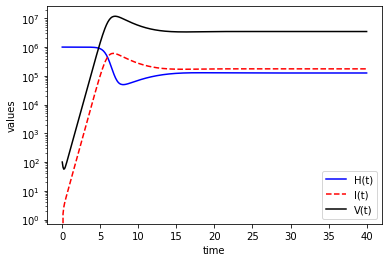

In [1]:
## preamble : This part loads the packages that we will use

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,kr1,kr2,kr3,kr4,kr5,kr6):
    
    #kr1 = 1e5 #= new healthy cells per year
    #kr2 = 0.1 #= death rate of healthy cells
    #kr3 = 2e-7 #= healthy cells converting to infected cells
    #kr4 = 0.5 #= death rate of infected cells
    #kr5 = 5 #= death rate of virus
    #kr6 = 100 #= production of virus by infected cells
    
    H = z[0]
    I = z[1]
    V = z[2]
    dHdt = kr1-kr2*H-kr3*H*V
    dIdt = kr3*H*V-kr4*I 
    dVdt = -kr3*H*V-kr5*V+kr6*I
    dzdt = [dHdt,dIdt,dVdt]
    return dzdt

# initial condition
z0 = [1e6,0,100]


# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# solve ODE
z = odeint(model,z0,t,args=(1e5,0.1,2e-7,0.5,5,100))

# plot results
plt.semilogy(t,z[:,0],'b-',label='H(t)')
plt.semilogy(t,z[:,1],'r--',label='I(t)')
plt.semilogy(t,z[:,2],'k',label='V(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

In [2]:
# Model definition
def dIdt(I,t,mu,r0):
  return mu*(r0-1)*I

mu,r0=1/14,3 ## chosen parameter values
t,I= 0,1     ## initial conditions
print(dIdt(I,t,mu,r0)) # slope at t=0

0.14285714285714285


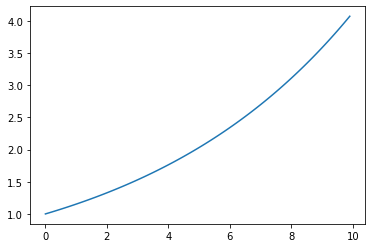

In [3]:
h,tmax=0.1,10     ## define step size and tmax
n = round(tmax/h) ## number of steps

# We will build up lists of results as we step forward
tlist, ilist = np.array([t]),np.array([I])

for k in range(1,n):
  t, I= t+h, I+h*dIdt(I,t,mu,r0)
  tlist=np.append(tlist,t)
  ilist=np.append(ilist,I)

plt.plot(tlist,ilist)




In [4]:
print(np.append(tlist,1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9 1. ]


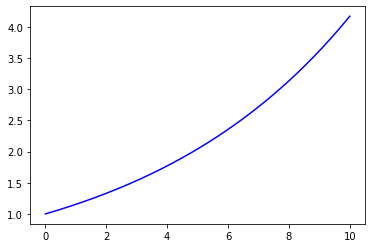

In [5]:
# Model definition
def dIdt(I,t,mu,r0):
  return mu*(r0-1)*I

I0 = 1             ## initial condition
n,tmax = 401,10    ## n is number of time points

t = np.linspace(0,tmax,n) # time points

# solve ODE
I = odeint(dIdt,I0,t,args=(1/14,3))

# plot results
plt.plot(t,I,'b-')

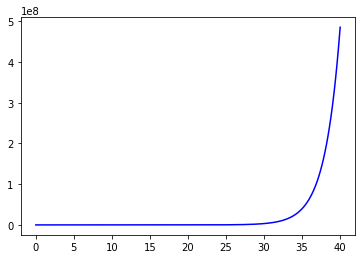

In [6]:

dIdt = lambda I,t : 1/4*(3-1)*I

# initial condition
z0 = 1

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# solve ODE
I = odeint(dIdt,z0,t)

# plot results
plt.plot(t,I,'b-')

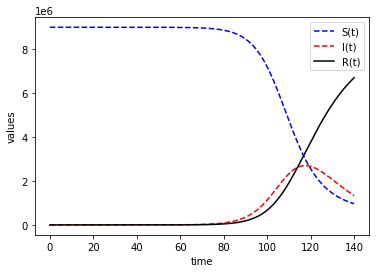

In [7]:
# Model definition
def dXdt(X,t,mu,beta,N):
  dSdt= -beta*X[0]*X[1]/N
  dIdt= beta*X[0]*X[1]/N - mu*X[1]
  dRdt= mu*X[1]
  return [dSdt,dIdt,dRdt]

pop = 9e6 ## The population of London is  ~9 million

# initial condition
X0 = [pop,1,0]  

# solve ODE
tmax,n = 140,401
t = np.linspace(0,tmax,n)
X = odeint(dXdt,X0,t,args=(1/14,3/14,pop))

# plot results
plt.plot(t,X[:,0],'b--',label='S(t)')
plt.plot(t,X[:,1],'r--',label='I(t)')
plt.plot(t,X[:,2],'k',label='R(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()



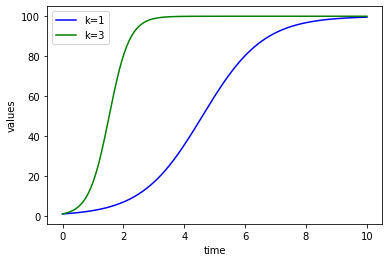

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Model definition
def dSdt(S,t,k,L):
  return k*S*(1-S/L)

S0 = 1             ## initial condition
n,tmax = 401,10    ## n is number of time points

t = np.linspace(0,tmax,n) # time points

# solve ODE
S1 = odeint(dSdt,S0,t,args=(1,100))
S2 = odeint(dSdt,S0,t,args=(3,100))

# plot results
plt.plot(t,S1,'b-',label='k=1')
plt.plot(t,S2,'g-',label='k=3')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

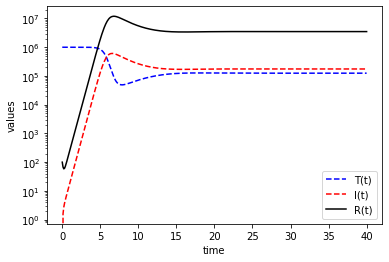

In [9]:
# Model definition
def dXdt(X,t,L,dT,dI,c,k,b):
  dTdt= L-b*X[0]*X[2]-dT*X[0]
  dIdt= b*X[0]*X[2]-dI*X[1]
  dVdt= k*X[1]-c*X[2]
  return [dTdt,dIdt,dVdt]

# initial condition
X0 = [1e6,0,100]  

# solve ODE
tmax,n = 40,401
t = np.linspace(0,tmax,n)
X = odeint(dXdt,X0,t,args=(1e5,0.1,0.5,5,100,2e-7))

# plot results
plt.semilogy(t,X[:,0],'b--',label='T(t)')
plt.semilogy(t,X[:,1],'r--',label='I(t)')
plt.semilogy(t,X[:,2],'k',label='R(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

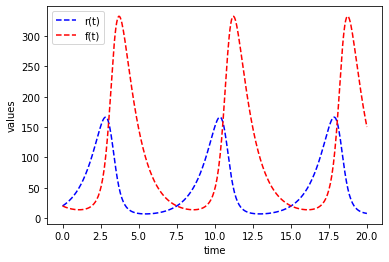

In [10]:
# Model definition
def dXdt(X,t,a,b,alpha,beta):
  drdt= a*X[0]-alpha*X[0]*X[1]
  dfdt= -b*X[1]+beta*X[0]*X[1]
  return [drdt,dfdt]

# initial condition
X0 = [20,20]  

# solve ODE
tmax,n = 20,401
t = np.linspace(0,tmax,n)
X = odeint(dXdt,X0,t,args=(1,1,0.01,0.02))

# plot results
plt.plot(t,X[:,0],'b--',label='r(t)')
plt.plot(t,X[:,1],'r--',label='f(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()